In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

In [ ]:
url = 'https://raw.githubusercontent.com/cbarnes5/DATA606CapstoneProject/main/finalcsv.csv'
df = pd.read_csv(url, index_col = 0)

In [ ]:
df

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE
0,2024-04-15,Condo/Co-op,1391 Pennsylvania Ave SE #354,Washington,DC,20003.0,295000.0,0.0,1.0,Old City 1,451.0,NaN,2007.0,310.0,38.880206,-76.987612
1,2024-05-10,Townhouse,1346 K St SE,Washington,DC,20003.0,560000.0,3.0,1.0,Old City 1,1400.0,1752.0,1926.0,0.0,38.878566,-76.986884
2,2024-03-28,Condo/Co-op,1391 Pennsylvania Ave SE #311,Washington,DC,20003.0,695000.0,2.0,2.0,Old City 1,1234.0,NaN,2007.0,831.0,38.880206,-76.987612
3,2024-03-22,Townhouse,1507 Freedom Way SE,Washington,DC,20003.0,785000.0,3.0,3.5,HILL EAST,1766.0,NaN,1979.0,0.0,38.879773,-76.982862
4,2024-04-15,Condo/Co-op,1391 Pennsylvania Ave SE #426,Washington,DC,20003.0,425000.0,1.0,1.0,Old City 1,684.0,NaN,2007.0,475.0,38.880206,-76.987612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2024-04-26,Single Family Residential,2706 Valley Dr,Alexandria,VA,22302.0,1625000.0,5.0,4.5,BRADDOCK HEIGHTS,3600.0,7050.0,1940.0,0.0,38.828810,-77.079460
2425,2024-05-16,Condo/Co-op,3212 Wellington Rd #103,Alexandria,VA,22302.0,429000.0,2.0,1.0,PARKFAIRFAX,900.0,NaN,1941.0,542.0,38.834207,-77.077879
2426,2024-04-12,Townhouse,1724 Preston Rd,Alexandria,VA,22302.0,422000.0,2.0,1.0,PARKFAIRFAX,930.0,NaN,1941.0,561.0,38.835865,-77.082432
2427,2024-04-26,Condo/Co-op,1606 Ripon Pl,Alexandria,VA,22302.0,380000.0,2.0,1.0,PARKFAIRFAX,900.0,NaN,1941.0,495.0,38.834562,-77.082253


First we OHE the property type column

In [ ]:
df = pd.get_dummies(df, columns=['PROPERTY TYPE'], dtype = int)
df

,SOLD DATE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,2024-04-15,1391 Pennsylvania Ave SE #354,Washington,DC,20003.0,295000.0,0.0,1.0,Old City 1,451.0,NaN,2007.0,310.0,38.880206,-76.987612,1,0,0,0
1,2024-05-10,1346 K St SE,Washington,DC,20003.0,560000.0,3.0,1.0,Old City 1,1400.0,1752.0,1926.0,0.0,38.878566,-76.986884,0,0,0,1
2,2024-03-28,1391 Pennsylvania Ave SE #311,Washington,DC,20003.0,695000.0,2.0,2.0,Old City 1,1234.0,NaN,2007.0,831.0,38.880206,-76.987612,1,0,0,0
3,2024-03-22,1507 Freedom Way SE,Washington,DC,20003.0,785000.0,3.0,3.5,HILL EAST,1766.0,NaN,1979.0,0.0,38.879773,-76.982862,0,0,0,1
4,2024-04-15,1391 Pennsylvania Ave SE #426,Washington,DC,20003.0,425000.0,1.0,1.0,Old City 1,684.0,NaN,2007.0,475.0,38.880206,-76.987612,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2024-04-26,2706 Valley Dr,Alexandria,VA,22302.0,1625000.0,5.0,4.5,BRADDOCK HEIGHTS,3600.0,7050.0,1940.0,0.0,38.828810,-77.079460,0,0,1,0
2425,2024-05-16,3212 Wellington Rd #103,Alexandria,VA,22302.0,429000.0,2.0,1.0,PARKFAIRFAX,900.0,NaN,1941.0,542.0,38.834207,-77.077879,1,0,0,0
2426,2024-04-12,1724 Preston Rd,Alexandria,VA,22302.0,422000.0,2.0,1.0,PARKFAIRFAX,930.0,NaN,1941.0,561.0,38.835865,-77.082432,0,0,0,1
2427,2024-04-26,1606 Ripon Pl,Alexandria,VA,22302.0,380000.0,2.0,1.0,PARKFAIRFAX,900.0,NaN,1941.0,495.0,38.834562,-77.082253,1,0,0,0


Note that in future versions, there should be more code here taking into account the neighborhood that a house is in.

In [ ]:
dropped = ['SOLD DATE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'LOCATION', 'LATITUDE', 'LONGITUDE']
df = df.drop(columns = dropped)

In [ ]:
df

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,295000.0,0.0,1.0,451.0,NaN,2007.0,310.0,1,0,0,0
1,560000.0,3.0,1.0,1400.0,1752.0,1926.0,0.0,0,0,0,1
2,695000.0,2.0,2.0,1234.0,NaN,2007.0,831.0,1,0,0,0
3,785000.0,3.0,3.5,1766.0,NaN,1979.0,0.0,0,0,0,1
4,425000.0,1.0,1.0,684.0,NaN,2007.0,475.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2424,1625000.0,5.0,4.5,3600.0,7050.0,1940.0,0.0,0,0,1,0
2425,429000.0,2.0,1.0,900.0,NaN,1941.0,542.0,1,0,0,0
2426,422000.0,2.0,1.0,930.0,NaN,1941.0,561.0,0,0,0,1
2427,380000.0,2.0,1.0,900.0,NaN,1941.0,495.0,1,0,0,0


In [ ]:
df = df.fillna(0)

Let's look at a coorelation heat map before doing anything else

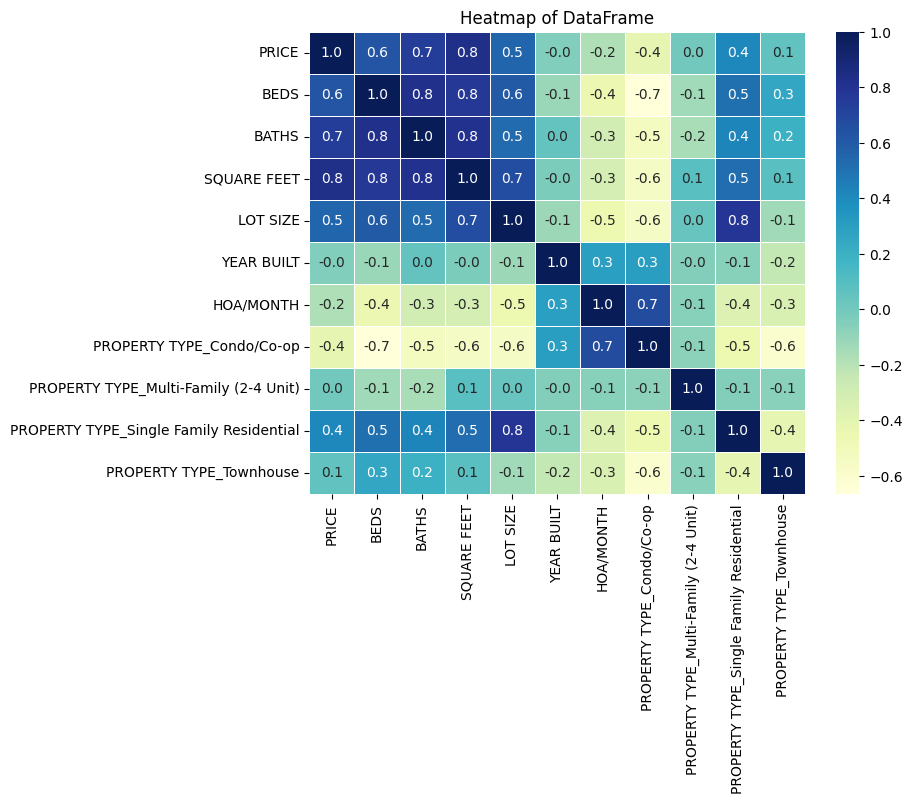

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Heatmap of DataFrame')
plt.show()

Interesting that year build has close to no correlation with sales price. Note that HOA/Month has a small correlation with sales price, and a very high correlation with Condo/Co-op, so we may consider omitting these. Let's observe the distribution of our variables

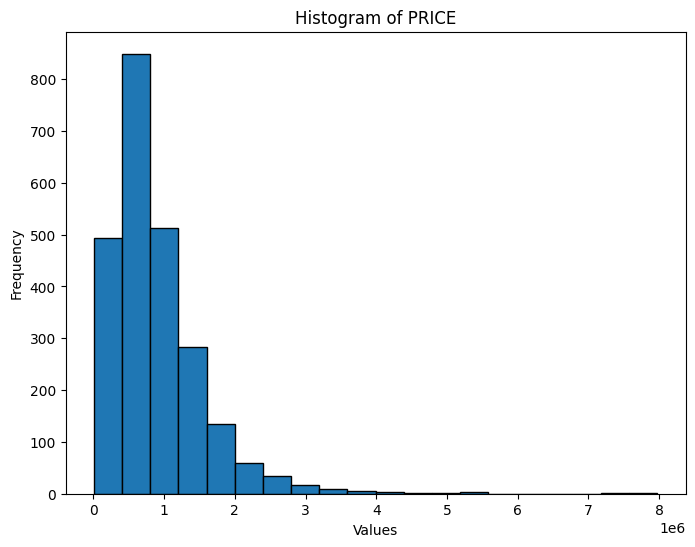

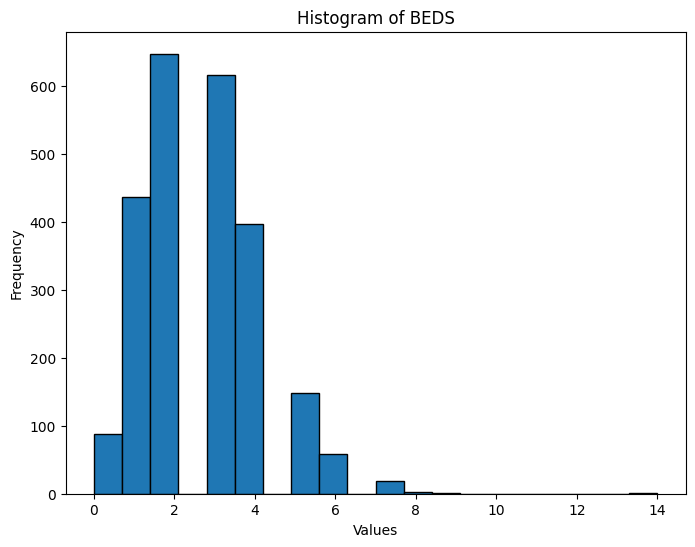

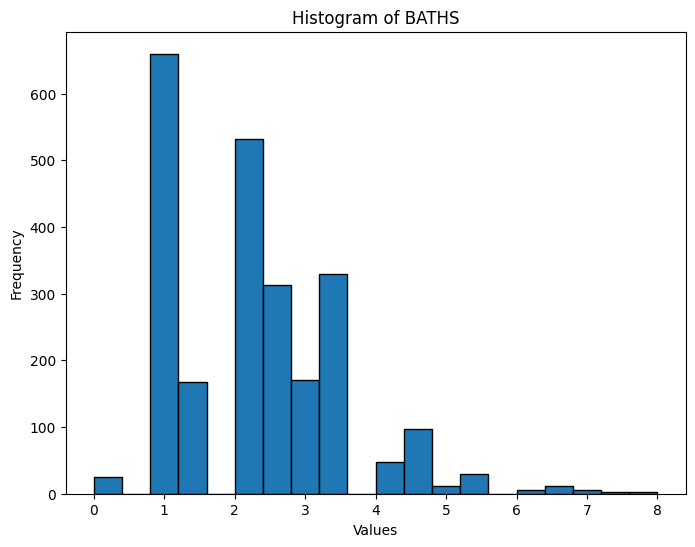

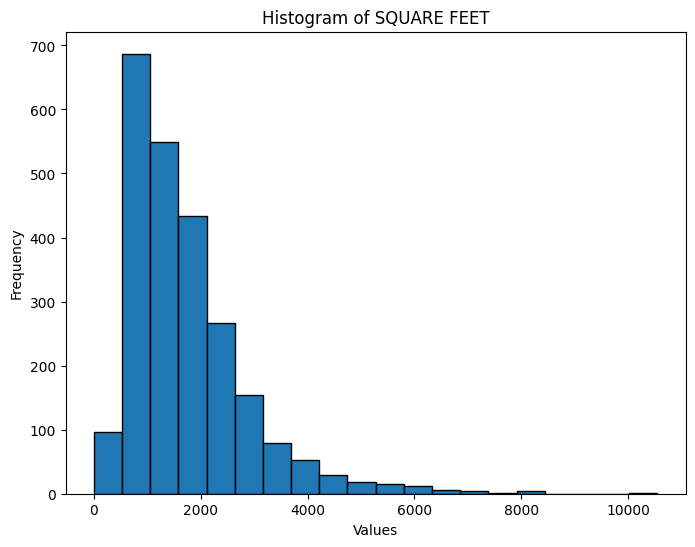

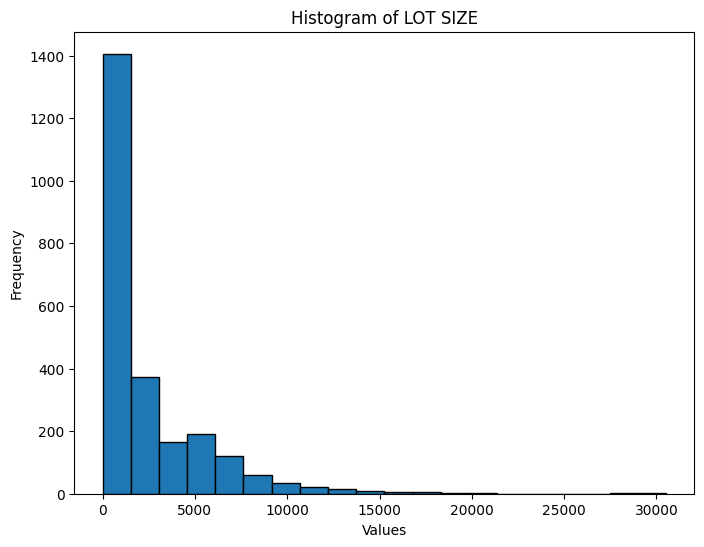

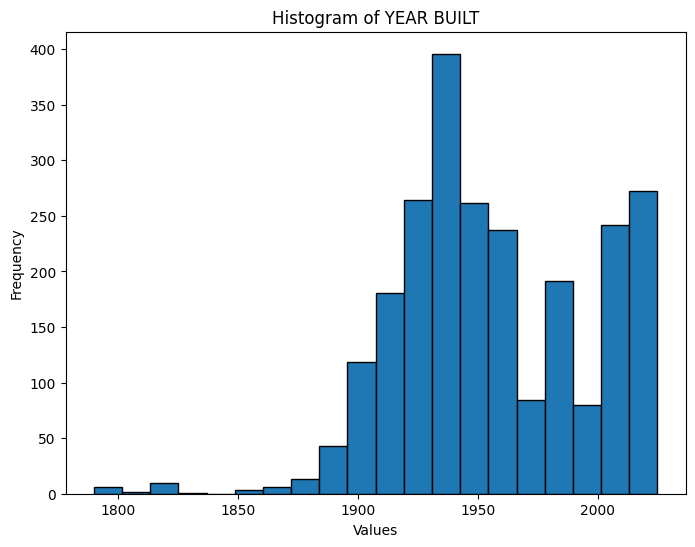

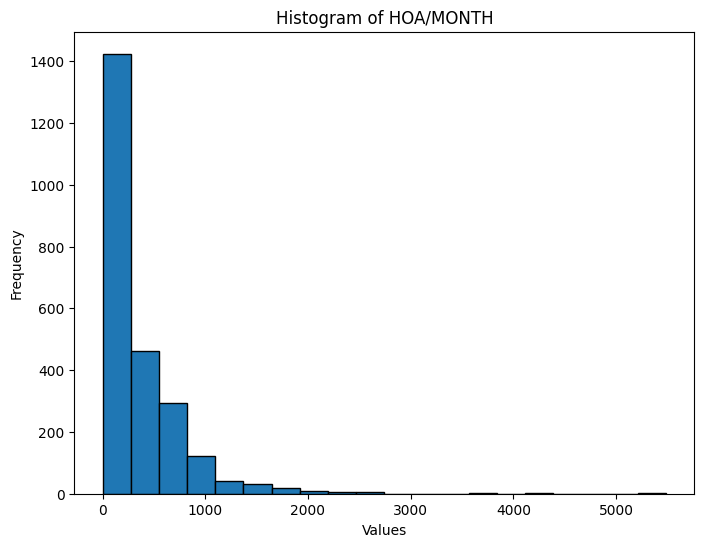

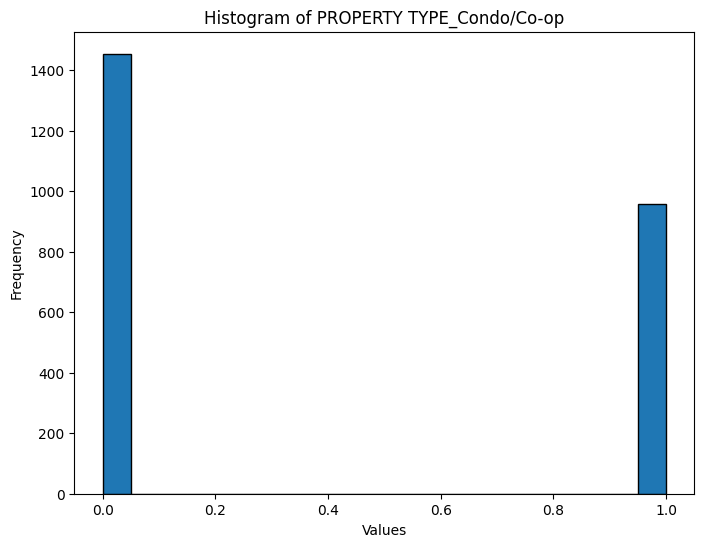

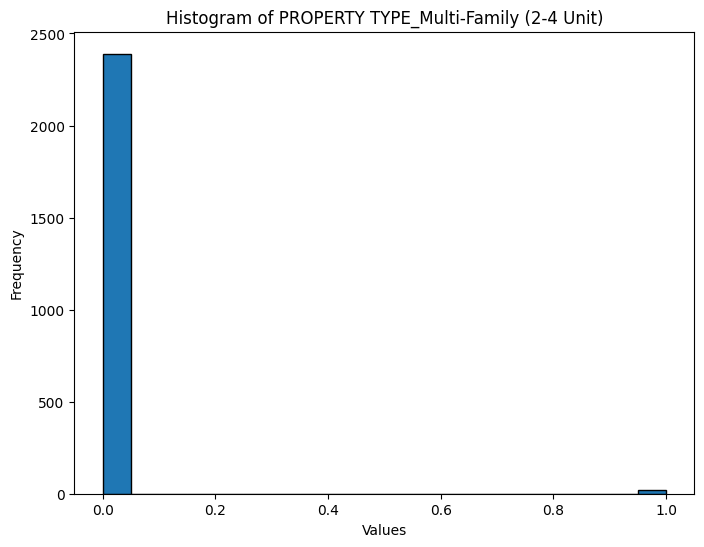

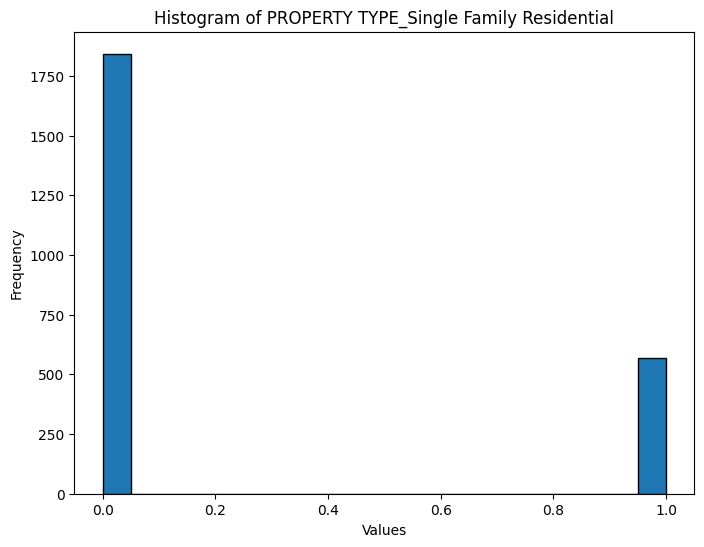

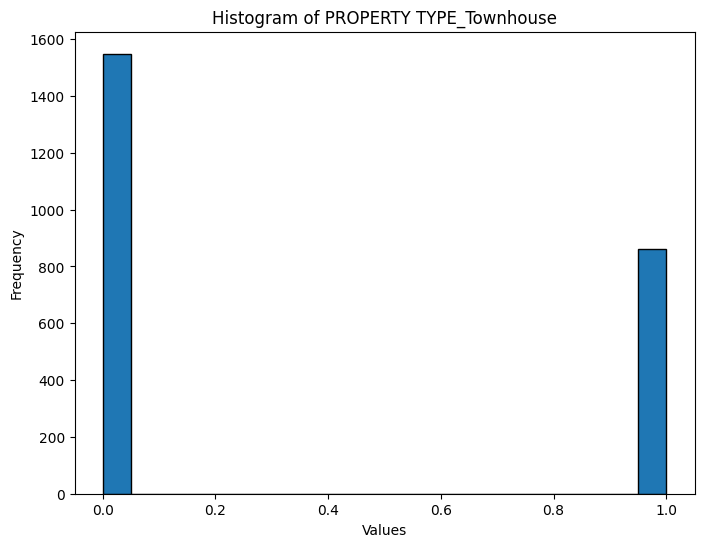

In [ ]:
for col in df.columns:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=20, edgecolor='black')
  plt.title('Histogram of ' + col)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

No obscene outliers which is good. Distributions are often skewed which suggests to use a robust scaler for our numeric variables

In [ ]:
X = df.drop(columns = ['PRICE'])
y = df['PRICE']

In [ ]:
robust_columns = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'HOA/MONTH', 'YEAR BUILT']
scaler = RobustScaler()
X[robust_columns] = scaler.fit_transform(X[robust_columns])

In [ ]:
X

,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,PROPERTY TYPE_Condo/Co-op,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
0,-1.5,-0.50,-0.790523,-0.305647,0.934426,0.411502,1,0,0,0
1,0.0,-0.50,-0.041066,0.232808,-0.393443,-0.203272,0,0,0,1
2,-0.5,0.00,-0.172162,-0.305647,0.934426,1.444720,1,0,0,0
3,0.0,0.75,0.247976,-0.305647,0.475410,-0.203272,0,0,0,1
4,-1.0,-0.50,-0.606515,-0.305647,0.934426,0.738721,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2424,1.0,1.25,1.696347,1.861083,-0.163934,-0.203272,0,0,1,0
2425,-0.5,-0.50,-0.435933,-0.305647,-0.147541,0.871591,1,0,0,0
2426,-0.5,-0.50,-0.412241,-0.305647,-0.147541,0.909271,0,0,0,1
2427,-0.5,-0.50,-0.435933,-0.305647,-0.147541,0.778384,1,0,0,0


Model Selection Example:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = LinearRegression()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.025, 0.05, 0.01],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=100, scoring='r2', cv=5,
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters found: ", random_search.best_params_)
xgb_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found:  {'subsample': 0.9, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
xgb_model = random_search.best_estimator_

In [ ]:
param_grid = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=100, scoring='r2', cv=5,
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters found: ", random_search.best_params_)
rf_model = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found:  {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 863}


In [ ]:
scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

[0.67345558 0.70190474 0.68801417 0.74117403 0.72592271]
0.706094245558589


In [ ]:
scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

[0.70704169 0.78382496 0.68072713 0.78963791 0.77611393]
0.7474691226404395


In [ ]:
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(np.mean(scores))

[0.71069103 0.73228536 0.69877265 0.73071543 0.79458897]
0.7334106914431772


We could mess with stacking the latter two models. For the sake of this notebook we will just select xgb_model.

Now onto model evaluation

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

R-squared (R2): 0.7146713389818546
Mean Squared Error (MSE): 129903403491.23628
Feature Importances:
                                   Feature  Importance
2                              SQUARE FEET    0.363360
1                                    BATHS    0.191060
7    PROPERTY TYPE_Multi-Family (2-4 Unit)    0.098819
6                PROPERTY TYPE_Condo/Co-op    0.060809
8  PROPERTY TYPE_Single Family Residential    0.060572
4                               YEAR BUILT    0.050912
0                                     BEDS    0.050770
9                  PROPERTY TYPE_Townhouse    0.042679
3                                 LOT SIZE    0.042292
5                                HOA/MONTH    0.038728
